# Exercise 5

a) age

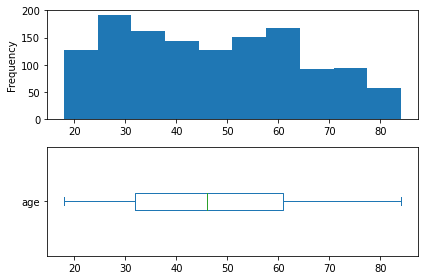

In [253]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('whickham.csv')

plt.subplot(2,1,1)
df['age'].plot.hist()
plt.subplot(2,1,2)
df['age'].plot.box(vert=False)
plt.tight_layout()
plt.show()

b) outcome and smoker

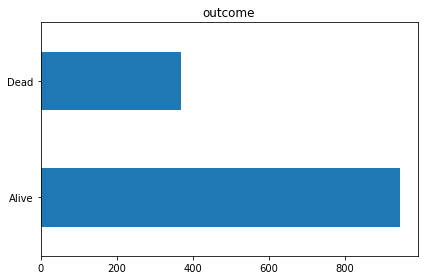

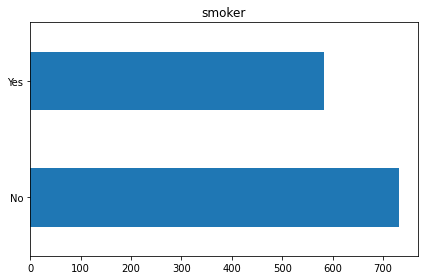

In [254]:
categorical_attributes = ['outcome', 'smoker']

for att in categorical_attributes:
    df[att].value_counts().plot.barh()
    plt.title(att)
    plt.tight_layout()
    plt.show()

c) I was surprised that there were more dead non-smokers than there were
dead smokers

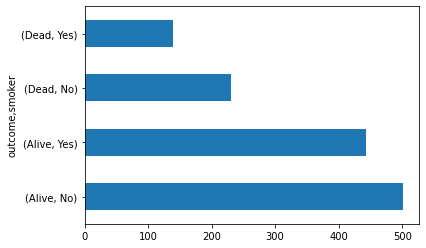

In [255]:
df.groupby(['outcome','smoker']).size().plot.barh()
plt.show()

d)

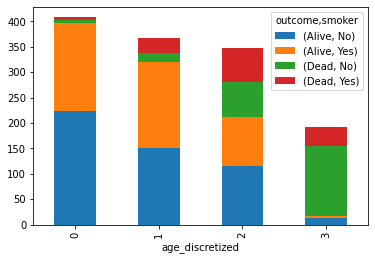

In [256]:
person_df = pd.read_csv('whickham.csv')
person_df['age_discretized'] = pd.cut(person_df.age, bins = 4, labels=False)
person_df.groupby(['age_discretized','smoker']).outcome.value_counts().unstack().unstack().plot.bar(stacked=True)
plt.show()

e) A lot of the deaths in dead non-smokers came from the higher age groups,
which means their deaths could be cause by natural or other means.

f) Doing this gives the visual 3 dimensions as it not only shows age groups,
but also outcome, smoker relationships within those groups.


# Exercise 6

In [257]:
report_df = pd.read_csv('WH Report_preprocessed.csv')

a)

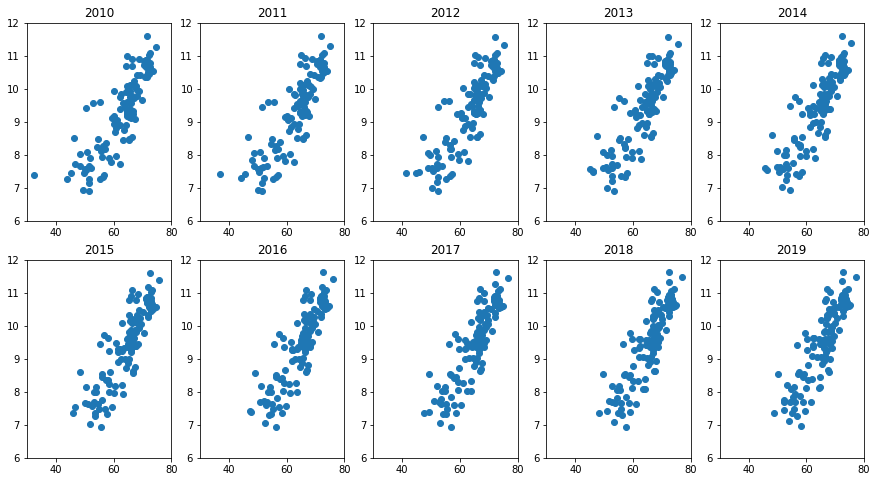

<Figure size 432x288 with 0 Axes>

interactive(children=(IntSlider(value=2010, description='year', max=2019, min=2010), Output()), _dom_classes=(…

<function __main__.plotyear(year)>

In [258]:
country_df = pd.read_csv('WH Report_preprocessed.csv')
plt.figure(figsize=(15,8)) 

year_poss = country_df.year.unique()

for i,yr in enumerate(year_poss):
    BM = country_df.year == yr
    X= country_df[BM].Healthy_life_expectancy_at_birth
    Y= country_df[BM].Log_GDP_per_capita
    
    plt.subplot(2,5,i+1)
    plt.scatter(X,Y)
    plt.title(yr)
    plt.xlim([30,80])
    plt.ylim([6,12])

plt.show()
plt.tight_layout()

Continent_poss = country_df.Continent.unique()
colors_dic={'Asia':'b', 'Europe':'g', 'Africa':'r', 'South America':'c',
            'Oceania':'m', 'North America':'y', 'Antarctica':'k'}
country_df.sort_values(['population'],inplace = True, ascending=False)

def plotyear(year):
    for cotinent in Continent_poss:
        BM1 = (country_df.year == year)
        BM2 = (country_df.Continent ==cotinent)
        BM = BM1 & BM2
        size = country_df[BM].population/200000
        X = country_df[BM].Healthy_life_expectancy_at_birth
        Y= country_df[BM].Log_GDP_per_capita
        plt.scatter(X,Y,c=colors_dic[cotinent], marker='o', s=size,
                    linewidths=0.5,edgecolors='w',label=cotinent)
        
    plt.xlabel('Healthy_life_expectancy_at_birth')
    plt.ylabel('Log_GDP_per_capita')
    plt.xlim([30,80])
    plt.ylim([6,12])
    plt.legend(markerscale=0.5)
    plt.show()

from ipywidgets import interact, widgets

interact(plotyear,year=widgets.IntSlider(min=2010,max=2019,step=1,value=2010))

b) For all continents its seems as though as the year increases, the
healthy life expectanct at birth increases as well. Africa has the lowest
healthy life expectanct at birth compared to the other countries, while Oceania
has a high one as well as having a denser population of people that share that
stat.

# Exercise 7

a)

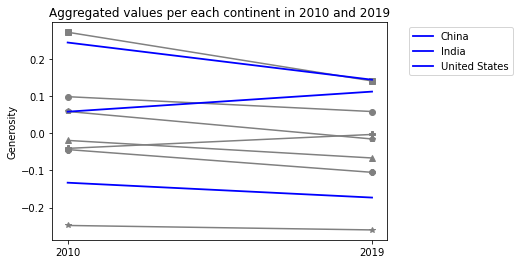

In [259]:
country_df = pd.read_csv('WH Report_preprocessed.csv')
continent_poss = country_df.Continent.unique()
new_countries = country_df.Name.unique()
byContinentYear_df = country_df.groupby(['Continent','year']).Generosity.mean()
byCountryYear_df = country_df.groupby(['Name','year']).Generosity.mean()
Markers_options = ['o', '^','P', '8', 's', 'p', '*']

for i,c in enumerate(continent_poss):
    plt.plot([2010,2019],byContinentYear_df.loc[c,[2010,2019]],
             label='_Hidden',marker=Markers_options[i], color='gray')
    
for c in new_countries:
    if c == 'United States' or c == 'China' or c == 'India':
        plt.plot([2010,2019],byCountryYear_df.loc[c,[2010,2019]],
                 label=c, color='blue', linewidth = 1.8)
    
plt.xticks([2010,2019])
plt.legend(bbox_to_anchor=(1.05, 1))
plt.title('Aggregated values per each continent in 2010 and 2019')
plt.ylabel('Generosity')
plt.show()

c) In terms of generosity, it seems that a majority of continents and countries
have been decreasing. But countries like China and India still remain high in
generosity even though their generosity is calculated per country instead of
per continent, which leads me to believe that they make up a majority of the
generosity in their perspective continents (Asia), while United States
does not (North America).